# Jupyter Notebook: Revisting a Concrete Strength Regression
##### Jorge Gimenez & Juan Carlos Soriano

In [9]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Llegir dades en csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carrega del dataset
dataset = load_dataset('./Database/Concrete_Data_Yeh.csv')
data = dataset.values


x = data[:, :(data.shape[1]-1)]
y = data[:, (data.shape[1]-1)]

print("Dimensio Database:", dataset.shape)
print("Dimensio entrades X:", x.shape)
print("Dimensio atribut Y:", y.shape)


Dimensio Database: (1030, 9)
Dimensio entrades X: (1030, 8)
Dimensio atribut Y: (1030,)


In [10]:
print(dataset.isnull().sum())

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


In [11]:
dataset.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


In [12]:
dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


<IPython.core.display.Javascript object>


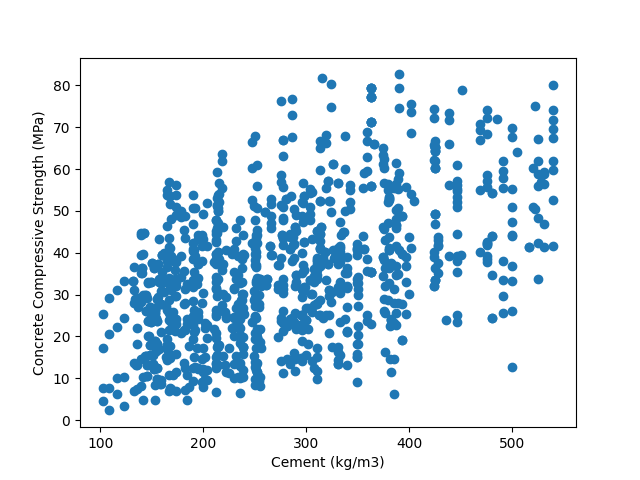

In [13]:
plt.figure()
plt.xlabel("Cement (kg/m3)")
plt.ylabel("Concrete Compressive Strength (MPa)")
ax = plt.scatter(x[:,0],y)

# Figure for every attribute on the DataBase contrasted with the Concrete Compressive Strength in MPa
    
    

<IPython.core.display.Javascript object>


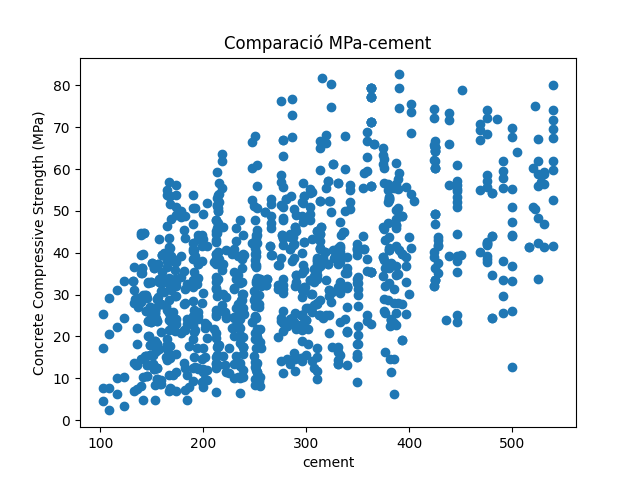

<IPython.core.display.Javascript object>


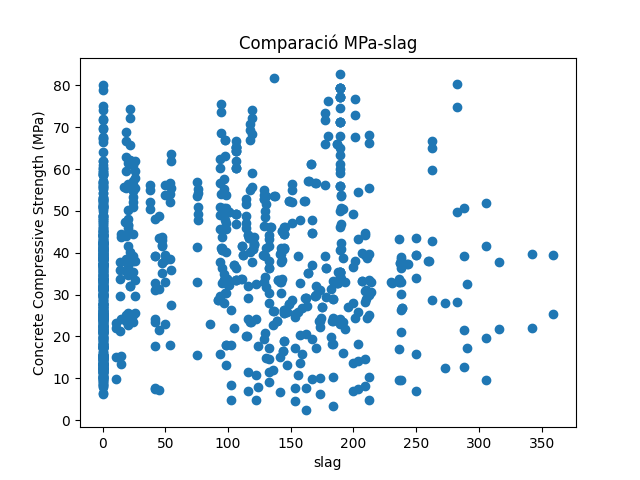

<IPython.core.display.Javascript object>


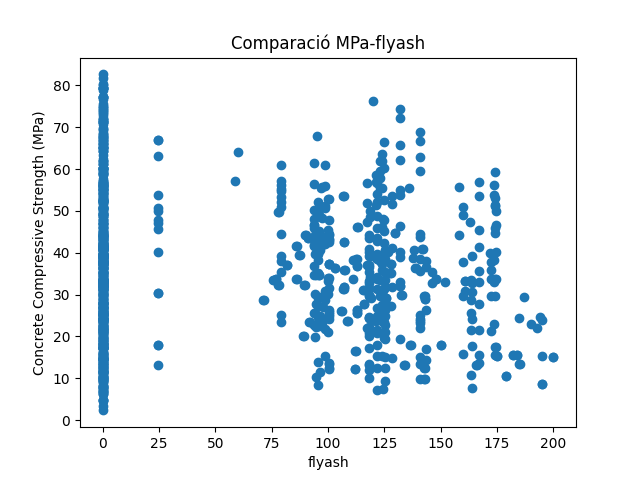

<IPython.core.display.Javascript object>


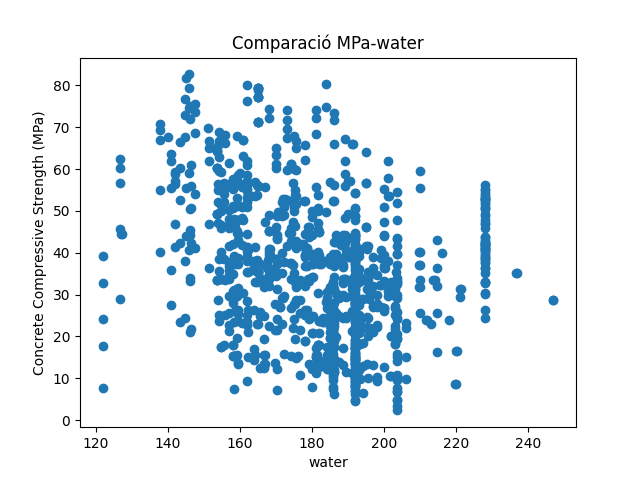

<IPython.core.display.Javascript object>


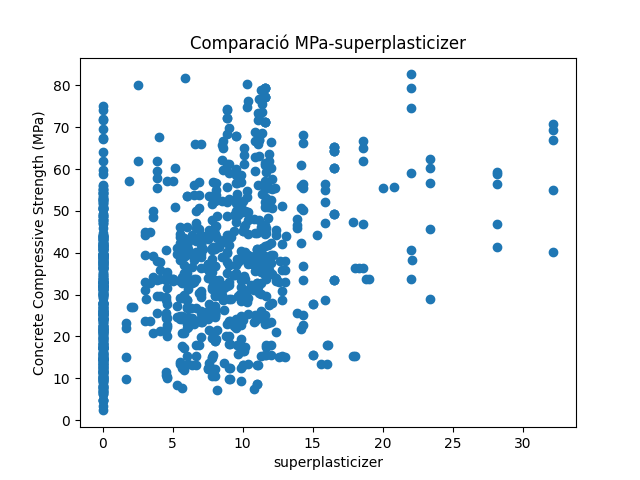

<IPython.core.display.Javascript object>


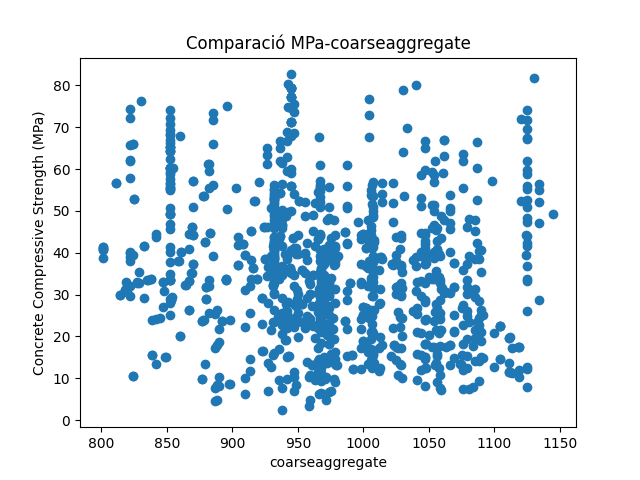

<IPython.core.display.Javascript object>


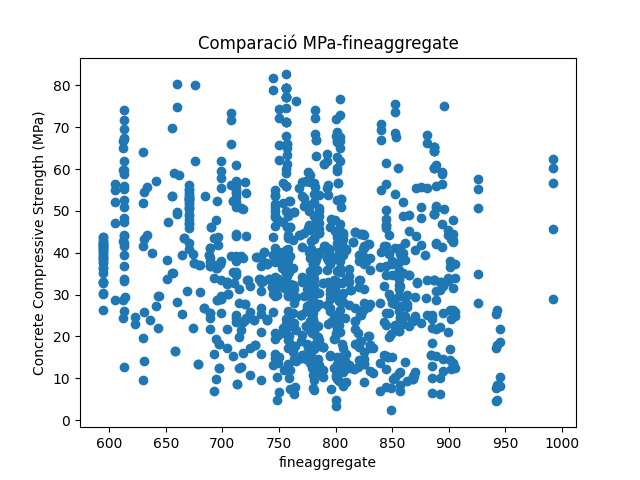

<IPython.core.display.Javascript object>


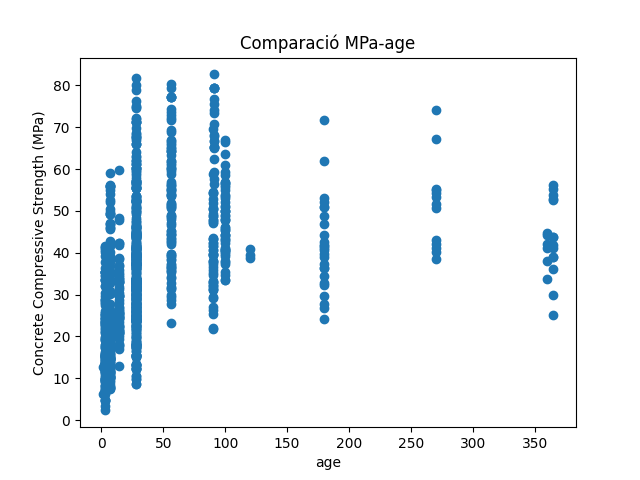

In [14]:
index = 0
for col in dataset:
    if index < 8:
        plt.figure()
        plt.title(f"Comparació MPa-{col}")
        plt.xlabel(f"{col}")
        plt.ylabel("Concrete Compressive Strength (MPa)")
        ax = plt.scatter(x[:,index],y)
        index = index + 1
        

# Correlation Study 

<IPython.core.display.Javascript object>


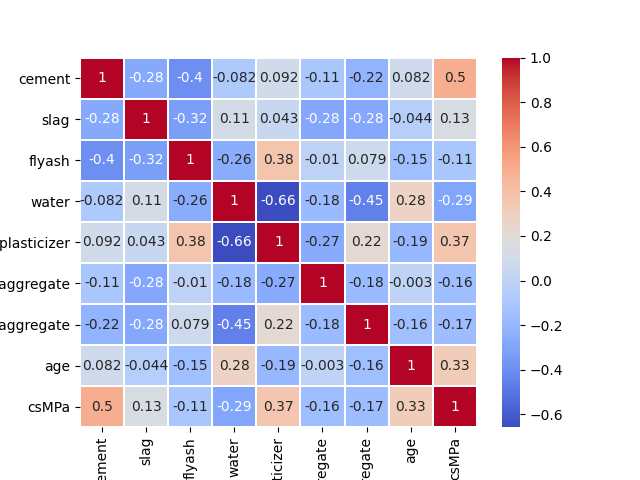

In [51]:
import seaborn as sns

corr = dataset.corr()

plt.figure()

ax = sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=.75)

<IPython.core.display.Javascript object>


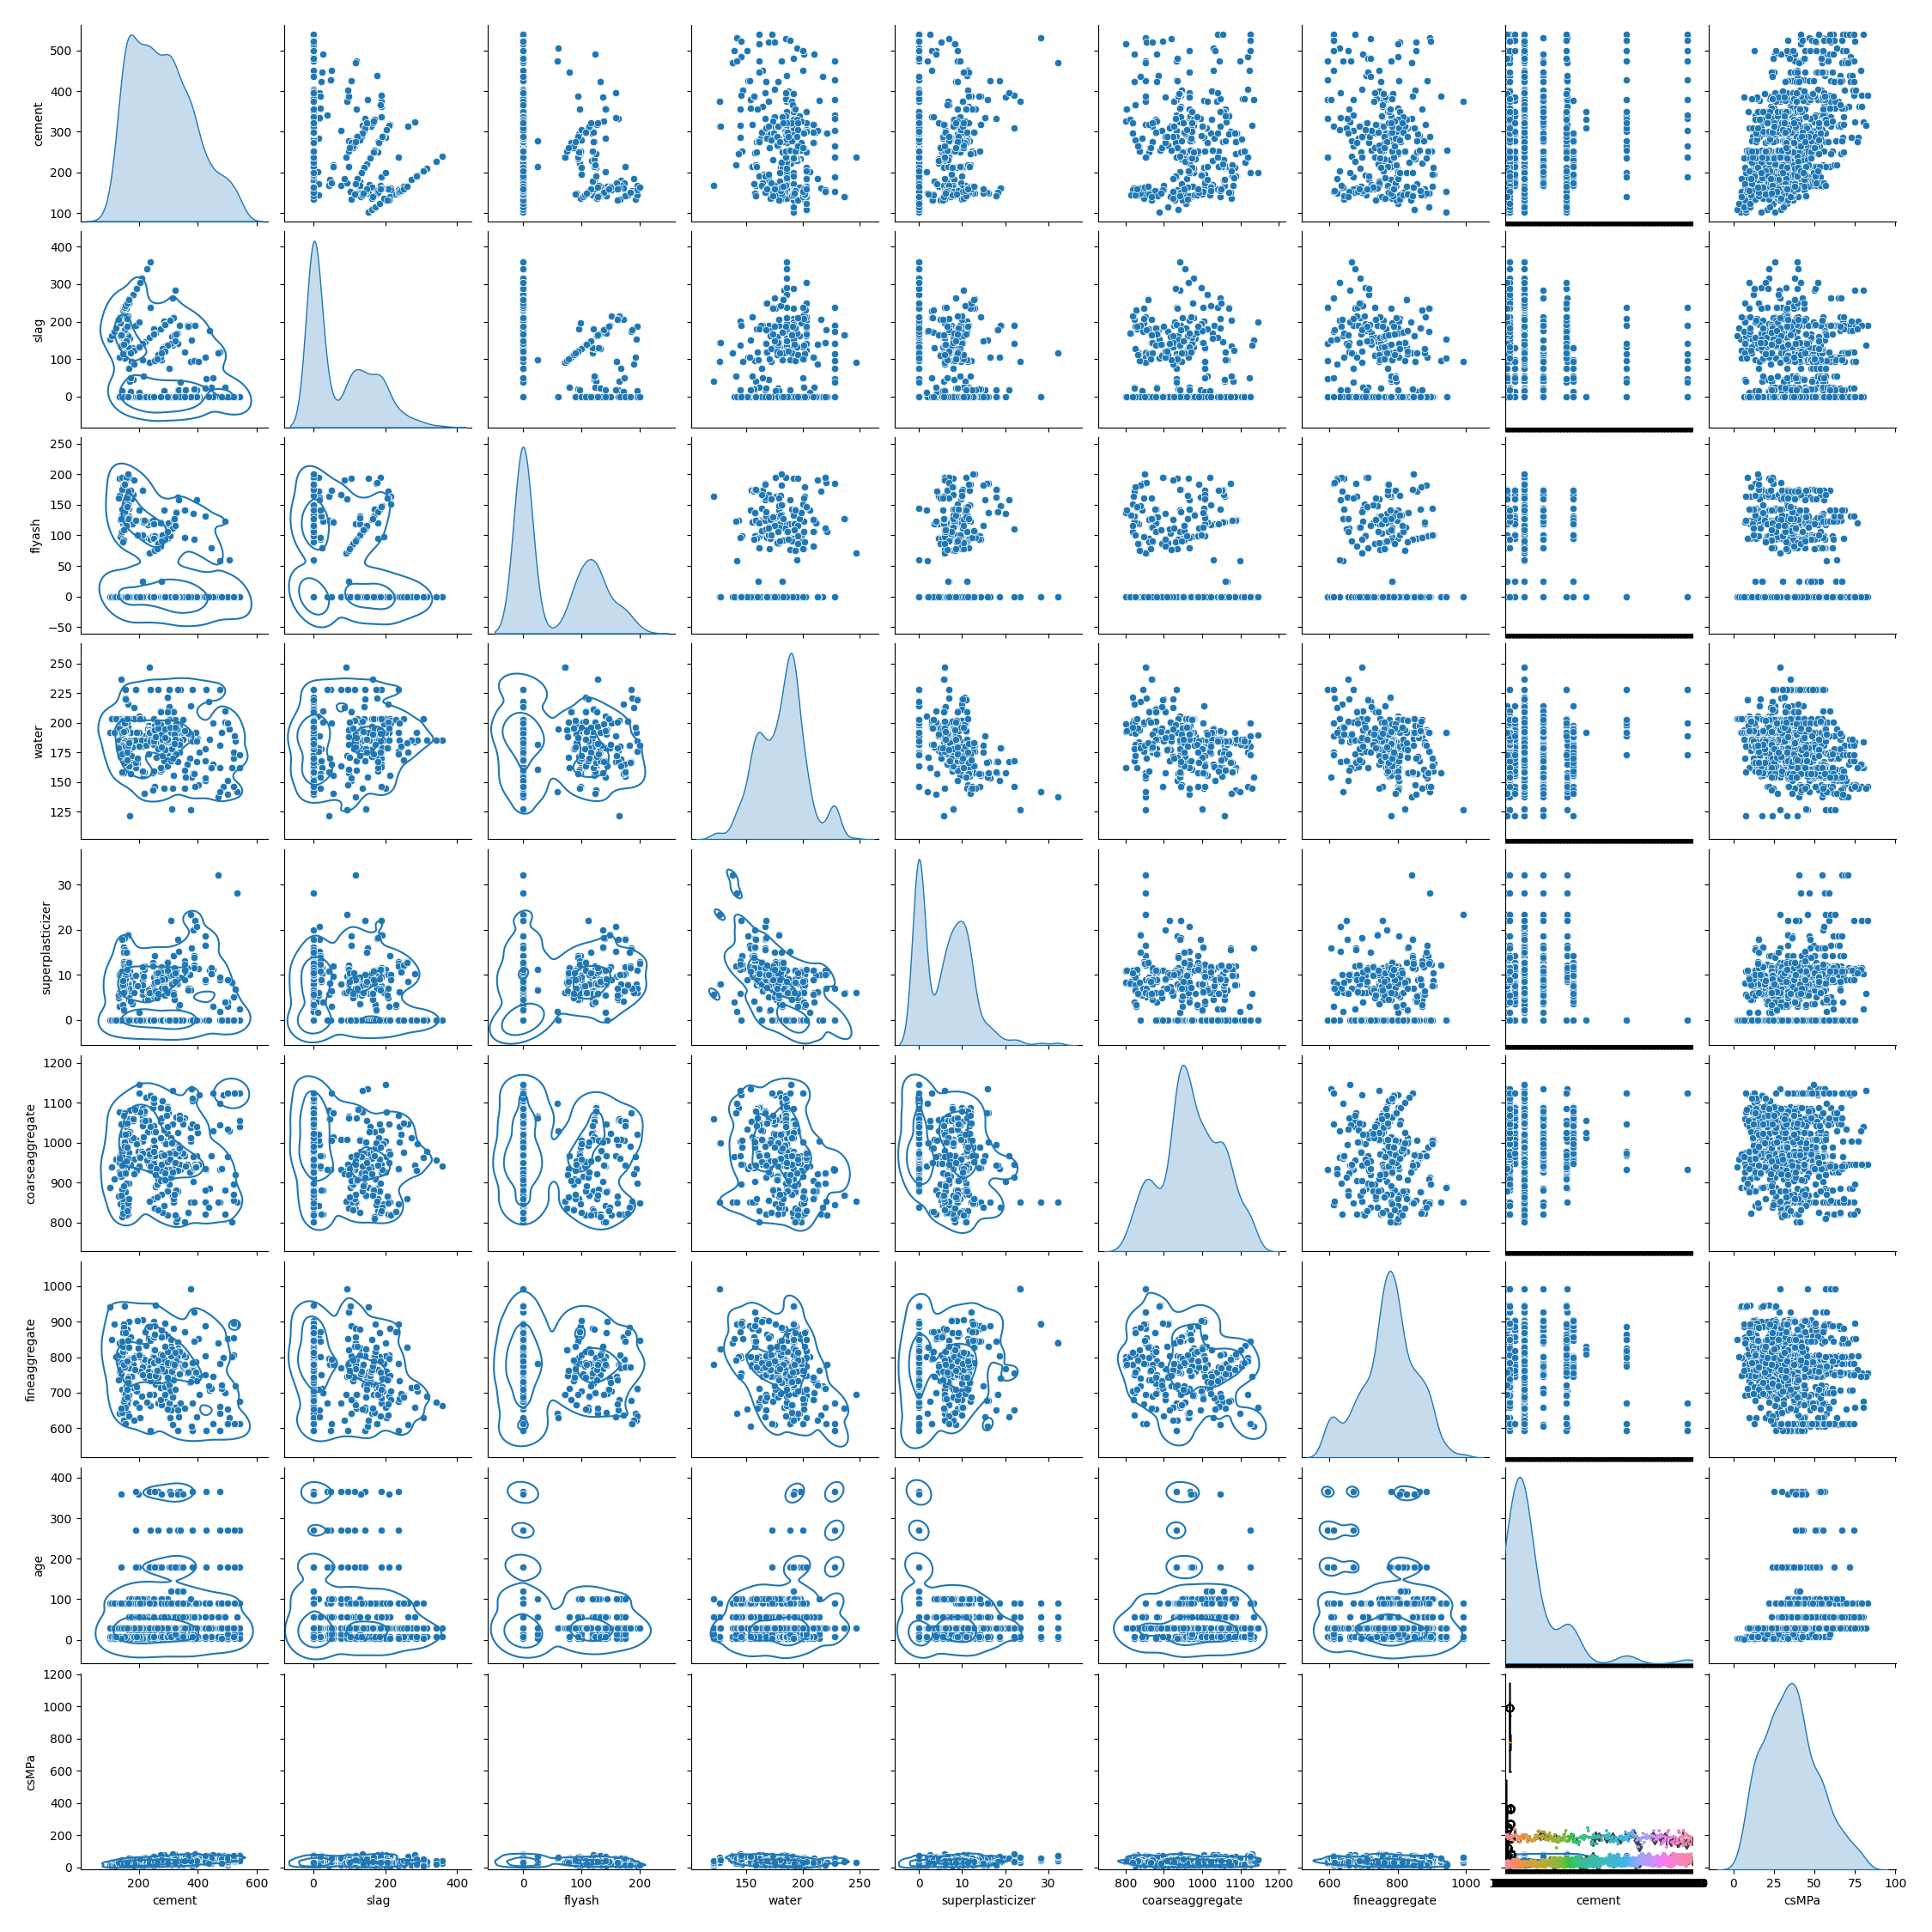

In [16]:
pp = sns.pairplot(dataset, palette="husl", diag_kind="kde")
pp.map_lower(sns.kdeplot, levels=3)

## Dirty Data
Let's see what we can do in order to clean our dataset and work with the correct inputs

<IPython.core.display.Javascript object>


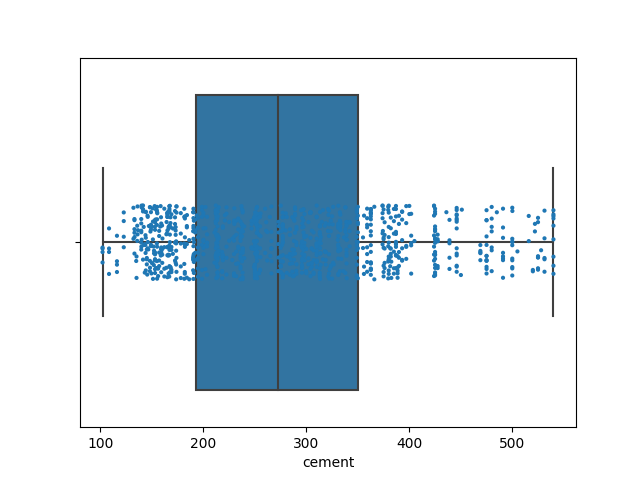

In [40]:
#boxplot + stripplot

plt.figure()
sns.boxplot(x=dataset["cement"])
sns.stripplot(x=dataset["cement"], data=dataset, size = 3, edgecolor="gray")
plt.show()

Looking at the above figure we can\'t make a difference between the noise and the useful range, there is a lot of dispersion

<IPython.core.display.Javascript object>


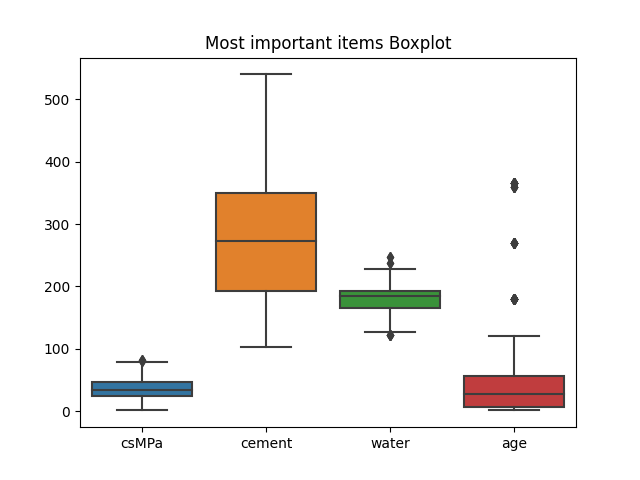

In [44]:
plt.figure()
plt.title("Most important items Boxplot")
ax = sns.boxplot(data=dataset, order=["csMPa", "cement", "water", "age"])

#With this function we put the different entry points on the plot giving us a better idea where the heatmap is created
#sns.stripplot(data=dataset, order=["csMPa", "cement", "water", "age"], size = 3, edgecolor="gray")

plt.show()

Could we throw away those dirty data that are not into the frequent range and get rid of the possible **noise** on our dataset? 
The next question is what we do with those dataset entries, **delete them** and use only the frequent ones or **low their weight** on the final dataset correlation?

What about looking the higher and lower values on the Pearson Correlation Table?

In [50]:
sortedCorr = corr.unstack().sort_values(kind="quicksort", ascending = False)

print(sortedCorr[sortedCorr!=1].head(10), "\n")

print(sortedCorr[sortedCorr!=1].tail(10))

cement            csMPa              0.498
csMPa             cement             0.498
flyash            superplasticizer   0.378
superplasticizer  flyash             0.378
                  csMPa              0.366
csMPa             superplasticizer   0.366
age               csMPa              0.329
csMPa             age                0.329
water             age                0.278
age               water              0.278
dtype: float64 

csMPa             water              -0.290
water             csMPa              -0.290
slag              flyash             -0.324
flyash            slag               -0.324
                  cement             -0.397
cement            flyash             -0.397
fineaggregate     water              -0.451
water             fineaggregate      -0.451
superplasticizer  water              -0.658
water             superplasticizer   -0.658
dtype: float64


Higher Correlation

|Item|MPa Corr|
|----|---------------|
|Cement|0,5|
|SuperPlasticizer|0,37|
|Age|0,33|

Lower Correlation

|Item|MPa Corr|
|----|---------------|
|Water|-0,29|
|FineAggregate|-0,17|
|CoarseAggregate|-0,16|